In [26]:
import pandas as pd
import os

### Merging 12 months of data into one csv file


In [29]:
df = pd.read_csv(r"C:\Users\dh212182\OneDrive - Dunnhumby Ltd\Desktop\Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")

files = [file for file in os.listdir(r"C:\Users\dh212182\OneDrive - Dunnhumby Ltd\Desktop\Projects\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")]
 
allmonths_data = pd.DataFrame()

for file in files :
    df = pd.read_csv(r"C:/Users/dh212182/OneDrive - Dunnhumby Ltd/Desktop/Projects/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/" + file)
    allmonths_data = pd.concat([allmonths_data,df])
    
    
allmonths_data.to_csv("alldata.csv", index = False)

### Read from the updated CSV

In [31]:
all_data = pd.read_csv("alldata.csv")


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning Data

In [34]:
all_data = all_data.dropna(how = "all")

In [37]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]


In [40]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

### Adding month Column


In [38]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")


### Add Sales Column

In [42]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Best Month for sales


In [46]:
results = all_data.groupby("Month").sum()
results["Sales"].head()

Month
1    1822256.73
2    2202022.42
3    2807100.38
4    3390670.24
5    3152606.75
Name: Sales, dtype: float64

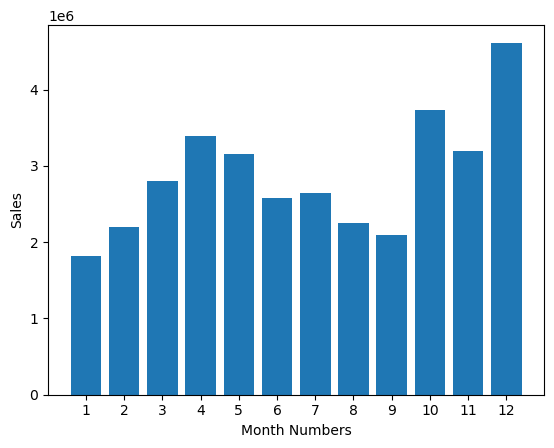

In [48]:
import matplotlib.pyplot as plt
months = range(1,13)

plt.bar(months,results["Sales"])
plt.xticks(months)
plt.ylabel("Sales")
plt.xlabel("Month Numbers")
plt.show()

### CIty with most sales

In [55]:
def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [57]:
results = all_data.groupby("City").sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


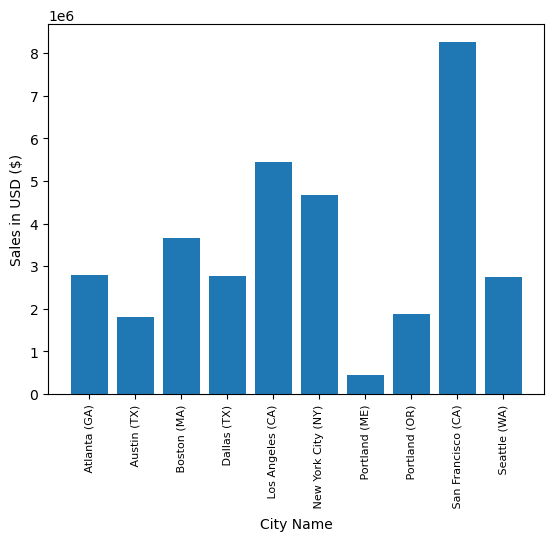

In [66]:
import matplotlib.pyplot as plt

keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

### Time to display advertisements to maximize likelihood of customer's buying product

In [72]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


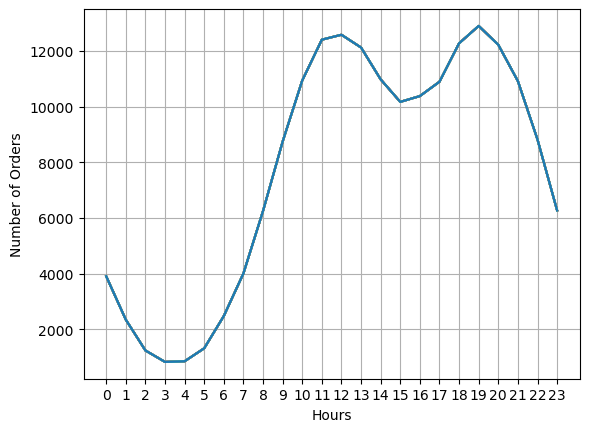

In [74]:
hours = [hour for hour, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# My recommendation is slightly before 11am or 7pm

### Products often sold together

In [78]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()


C:\Users\dh212182\AppData\Local\Temp\ipykernel_25904\2582873846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [79]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Product that sold the most

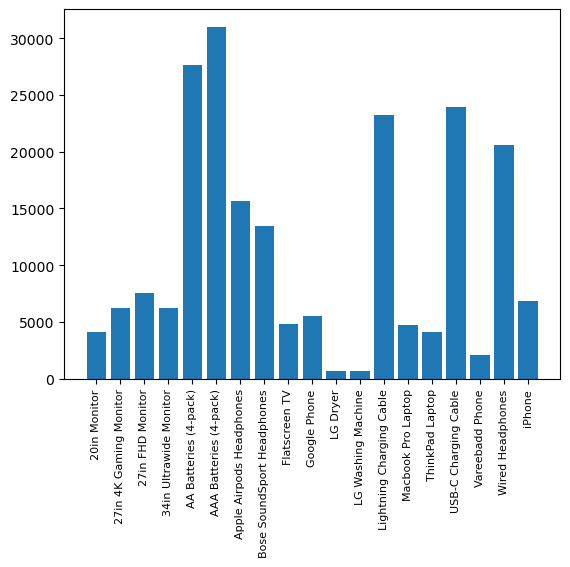

In [80]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\dh212182\AppData\Local\Temp\ipykernel_25904\244484573.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\dh212182\AppData\Local\Temp\ipykernel_25904\244484573.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


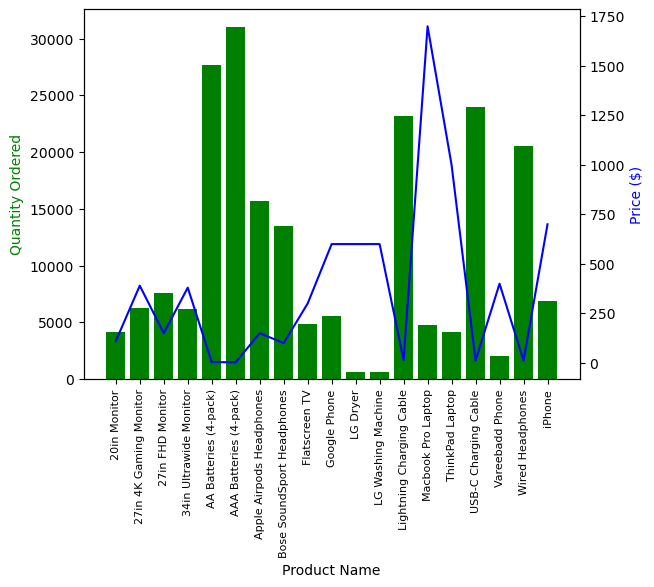

In [81]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()